# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
import scipy.stats as sps
from mpl_toolkits.axes_grid1 import make_axes_locatable

sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/aldenchico/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


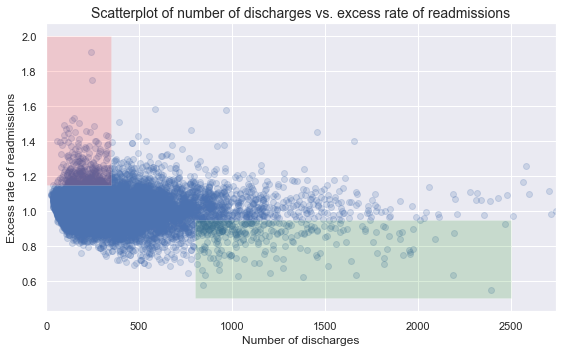

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [5]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### Do you agree with the above analysis and recommendations? Why or why not?

In the anaylsis above, the person who wrote the initial report claimed, "There is a significant correlation between hospital capacity (number of discharges) and readmission rates." To test this claim, we need to find the correlation coefficient between number of discharges and excess readmission rates to see if their claim was true. The Pearson correlation coefficent is a statistic that measures how closely two variables are related to one another. The coefficient ranges from -1 to 1 and the two variables relate more closely if the absolute value of the correlation coefficient is closer to 1. If the original author's original claim is to be considered true, then the absolute value of the correlation coefficient between the discharge frequency and readmission rate should be greater than or equal to 0.5.

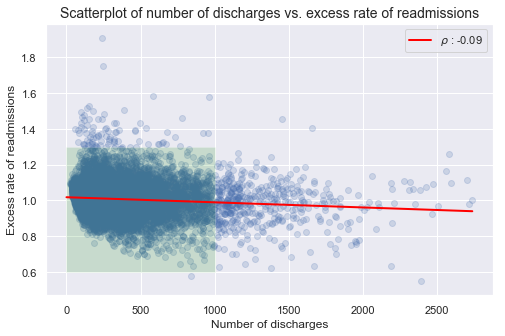

 The Pearson Correlation Coefficient for this sample is -0.09 


In [6]:
# Use the same discharge and readmission data from the original scatter plot to test the claim
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

# Find the linear regression between number of discharges and hospital readmission rate
slope, intercept = np.polyfit(x, y, 1)
x_line = np.linspace(0, max(x),100)
y_line = slope * x_line + intercept

# Find the Pearson correlation coefficient matrix between the two variables
rho = np.corrcoef(x, y)

# Plot the linear regression along with the original scatter plot
_ = plt.figure(figsize=(8,5))
_ = plt.scatter(x, y, alpha=0.2)
_ = plt.plot(x_line, y_line, color='red', linewidth=2, label=r'$\rho$ : -0.09')
_ = plt.legend(loc='upper right')
_ = plt.fill_between([0,1000], .6, 1.3, facecolor='green', alpha = .15, interpolate=True)

# Provide labels for the figure
_ = plt.xlabel('Number of discharges', fontsize=12)
_ = plt.ylabel('Excess rate of readmissions', fontsize=12)
_ = plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

# Display the results
plt.show()
print(f' The Pearson Correlation Coefficient for this sample is {rho[0][1]:.2f} ')

After taking the correlation coefficient between the discharge frequency and the hospital readmission rate, we find that their Pearson correlation coefficient is -0.09. This value suggests that the two variables are not closely correlated like the author suggests. The red line shows the line of closest fit between the two variables. Since the data is mostly clustered around low number of discharges with a rate of readmission lying anywhere between roughly 0.6-1.3, we cannot confidently say that less discharges leads to greater excess readmission rate since there's wide variation in excess readmission rates for low discharge volume. 

To validate our point, we can construct a Null Hypothesis Test to determine if the hospital discharge rate is correlated to readmission rate. For this test, we are going to assume that the Pearson correlation coefficient is less than or equal to -0.5 which suggests that the two variables are negatively correlated to represent the author's conclusion that the number of discharges and excess rate of readmissions are correlated. Our alternative hypothesis is that the correlation coefficient is between -0.5 and 0 which suggests that the two variables are not closely correlated. If our observation is outside a 99% confidence interval from our assumption, then we will reject the Null Hypothesis in favor for the alternative.

H<sub>0</sub>: $-1 \leq \rho \leq -0.5$

H<sub>a</sub>: $-0.5 < \rho \leq 0$

To perform this test using the data that we collected, we can sample with replacement from the number of discharges and hospital readmission rate data to create bootstrap sample pairs. These bootstrap sample pairs can then be used to generate bootstrap replicate Pearson correlation coefficients whose distribution is roughly normal. The normal distribution is accredited to the Central Limit Theorem that states that the distribution of 30 samples for the same test statistic is approximately normal. Using the normal distribution of 1,000 sample Pearson correlation coefficients, we can find a confidence interval where 99% of the sample Pearson correlation coefficients lie. If our observation is not contained within 99% of the bootstrap replicates we generated, then we will reject the notion that the hospital discharge rate is correlated to hospital readmission rate.

In [7]:
# Generate an array of bootstrap replicates from samples of x and y arrays
def generate_bs_rho(x, y, rho_not=0, size=100):
    bs_replicates = np.empty(size)
    inds = np.arange(len(x))
    rho_obs = np.corrcoef(x, y)[0][1]
    
    for i in range(size):
        # Generate bootstrap pairing samples for no. of discharges and rate of readmission
        bs_inds = np.random.choice(inds, len(inds))
        bs_x = [x[j] for j in bs_inds]
        bs_y = [y[j] for j in bs_inds]
        
        # Generate the Pearson correlation coefficient to measure correlation centered around null hyp. rho_not
        bs_rep = np.corrcoef(bs_x, bs_y)[0][1] - rho_obs + rho_not
        bs_replicates[i] = bs_rep
        
    return bs_replicates

In [8]:
# Plot bootstrap replicates with vertical lines for observation, average, and percentile line indicators
def plot_bs_replicates(bs_replicates, percentiles, labels, linestyles, observed=None):
   
    # Prepare the plot, percentile, and average for bootstrap replicates
    size = len(bs_replicates)
    bins = int(np.sqrt(size))
    mean_reps = np.mean(bs_replicates)
    bs_percentile_values = np.percentile(bs_replicates, percentiles)
    _ = plt.figure(figsize=(8, 5))
    _ = plt.hist(bs_replicates, bins=bins, density=True)
    
    # Zip input lists for loop
    groups = zip(bs_percentile_values, labels, linestyles)
    for group in groups:
        
        # Plot bootstrap percentile values as vertical lines
        _ = plt.axvline(group[0], color='red', linestyle=group[2], linewidth=1, 
                        label=group[1])
        
    # Plot average line
    _ = plt.axvline(mean_reps, color='black', linestyle='dashed', linewidth=3,
                    label=f'Average : {mean_reps:.4f}')
    
    # Plot the observation line if there is one to be observed
    if observed != None:
        _ = plt.axvline(observed, color = 'green', linestyle='dashed', linewidth=2,
                        label=f'Observed : {observed:.4f}')
    _ = plt.legend(loc='upper left')
    
    # Return the bootstrap percentile values
    return bs_percentile_values

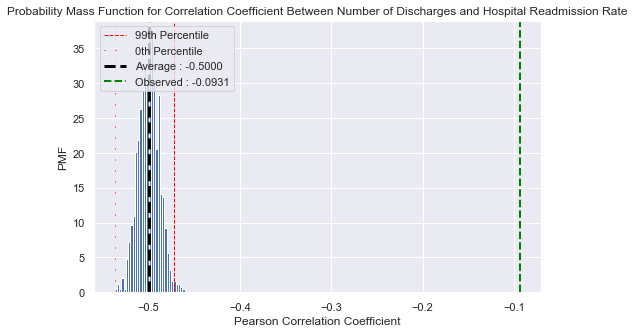

In [9]:
np.random.seed(42)

# Generate bootstrap replicates for the pearson correlation coefficient between rate of readmission and discharge
size = 1000
rho_not = -0.5
bs_replicates = generate_bs_rho(x, y, rho_not=rho_not, size=size)


# Find the summary statistics from our bootstrap replicates with a 99% confidence interval
rho_obs = np.corrcoef(x, y)[0][1]
mean_rho_reps = np.mean(bs_replicates)
std_reps = np.std(bs_replicates)
p_value = np.sum(bs_replicates >= rho_obs) / len(bs_replicates)
z_score = (rho_obs - mean_rho_reps) / std_reps

# Plot the bootstrap replicate correlation coefficients with vertical line percentile indicators
percentiles = [99, 0]
labels = [f'{perc}th Percentile' for perc in percentiles]
linestyles = ['dashed', (0, (1, 10))]
bs_percentile_values = plot_bs_replicates(bs_replicates, percentiles, labels, linestyles, observed=rho_obs)

# Label the plot
_ = plt.xlabel('Pearson Correlation Coefficient')
_ = plt.ylabel('PMF')
_ = plt.title('Probability Mass Function for Correlation Coefficient Between Number of Discharges and Hospital Readmission Rate')
plt.show()

In [10]:
# Print summary statistics
print(f'Average Pearson Correlation Coefficient is {mean_rho_reps:.4f}')
print(f'Observed Pearson Correlation Coefficient is {rho_obs: .4f}')
print(f'Standard Deviation for the Distribution is {std_reps:.4f}')
print(f'99% Confidence Interval for the Pearson Correlation Coefficient is Between {bs_percentile_values[0]:.4f} and {bs_percentile_values[1]:.4f}')
print(f'Observed P-Value is {p_value:.4f}')
print(f'Observed Z-Score is {z_score:.0f}')

Average Pearson Correlation Coefficient is -0.5000
Observed Pearson Correlation Coefficient is -0.0931
Standard Deviation for the Distribution is 0.0115
99% Confidence Interval for the Pearson Correlation Coefficient is Between -0.4717 and -0.5373
Observed P-Value is 0.0000
Observed Z-Score is 35


After bootstrap replicate testing, we find that our distribution is centered around -0.5000 with a standard deviation of 0.0115. With a one-tailed 99% confidence interval, the true population Pearson correlation coefficient should be between -0.5255 and -0.4717. Our observation of -0.0931, however, is far outside this confidence interval. In fact, our observation measures 35 standard deviations away from the hypothesized Pearson correlation coefficient of -0.5000 which is astronomically unlikely to happen given our Null Hypothesis is true. Our bootstrap replicate hypothesis test suggests that the true Pearson correlation coefficient is not between -1 and -0.5 which leads us to favor that hospital discharge frequency is not correlated to hospital readmission rates.

#### Provide support for your own arguments and recommendations.

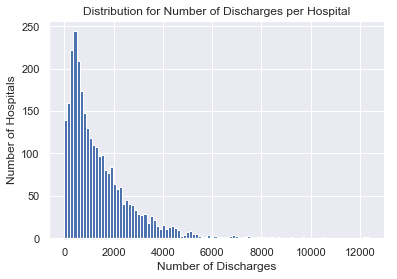

The median for number of discharges is 1024 discharges
The average number of discharges per hospital is 1438 discharges


In [11]:
discharges = clean_hospital_read_df.groupby('Hospital Name')['Number of Discharges'].sum()
_ = plt.hist(discharges, bins=100)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Number of Hospitals')
_ = plt.title('Distribution for Number of Discharges per Hospital')
plt.show()

quartiles = np.percentile(discharges, [25, 50, 75, 100])
mean_discharges = np.mean(discharges)
print(f'The median for number of discharges is {quartiles[1]:.0f} discharges')
print(f'The average number of discharges per hospital is {mean_discharges:.0f} discharges')

Shown above is the distribution for number of discharges in a hospital versus the number of hospitals in the provided data. We can see that there is a strong right skew which means that the average number of discharges per hospital will be greater than the median number of discharges. Indeed, the average number of discharges is 1438 whereas the median number of discharges is 1024. Since the author of the original article made the generalization that hospitals with less than 100 discharges experience higher excess readmission ratios than hospitals with more than 1000 discharges, we want to test their claim that lower volume hospitals experience higher excess readmission rates than higher volume hospitals. We should also find the percentile in which there is a difference between lower and upper percentiles. 

The author suggests that there's a difference in the most extreme cases of low and high hospital volume, but there's also a possibility that hospitals split along the middle will yield a difference. If there's a difference in excess readmission rates along the 50 percentile mark, it would suggest that there are factors for lower volume hospitals that yield greater readmission rates that higher volume hospitals.

To test this, we will set up a Null Hypothesis Test where the Null Hypothesis is that there is no difference in average excess readmission rates between the lower 50% and upper 50% volume hospitals and the excess readmission rates are okay as is. Our Alternative Hypothesis is that there is a noticeable difference between the two groups and that excess readmission rates need to be addressed.

H<sub>0</sub>: $\mu = 0$

H<sub>a</sub>: $\mu \neq 0$

$\mu = \overline{x}_{Lower 50 Percentile} - \overline{x}_{Upper 50 Percentile}$

$\alpha = 0.01$

In [12]:
# Generate two lists of tuples separated by percentiles along x
def sep_tuple_percentiles(x, y, percentiles):
    
    x_percentiles = np.percentile(x, percentiles)
    tuple_list = list(zip(x, y))
    low_perc = []
    high_perc = []
    for val in tuple_list:
        if val[0] <= x_percentiles[0]: 
            low_perc.append(val)
        elif val[0] >= x_percentiles[1]:
            high_perc.append(val)
        else:
            pass
    return low_perc, high_perc


In [13]:
# Adjust two lists to have the same length
def adjust_lists(x1, x2):
    if len(x1) > len(x2):
        return x1[:len(x2)], x2
    elif len(x1) < len(x2):
        return x1, x2[:len(x1)]
    else:
        return x1, x2

In [14]:
# Generate list of bootstrap mean differences between list of tuples
def generate_bs_mean_differences(x1, x2, mu_not=0, size=100):
    np.random.seed(42)
    # Generate the observed mean difference statistic from tuple list
    x1_mean = np.mean([j[1] for j in x1])
    x2_mean = np.mean([j[1] for j in x2])
    mu_obs = x1_mean - x2_mean
    
    # Prepare for bootstrap replicates
    bs_replicates = np.empty(size)
    inds = np.arange(len(x1))
    
    for i in range(size):

        # Generate bootstrap samples from list of tuples
        bs_inds = np.random.choice(inds, len(inds))
        bs_sample_x1 = [x1[j] for j in bs_inds]
        bs_sample_x2 = [x2[j] for j in bs_inds]
        
        
        # Gather the value of interest from the tuple
        x1_val = [j[1] for j in bs_sample_x1]
        x2_val = [j[1] for j in bs_sample_x2]
        
        # Generate the mean difference centered around null hyp. mu_not and add to bs_replicates list
        mean_difference = np.mean(x1_val) - np.mean(x2_val)
        bs_rep = mean_difference - mu_obs + mu_not
        bs_replicates[i] = bs_rep
        
    return mu_obs, bs_replicates

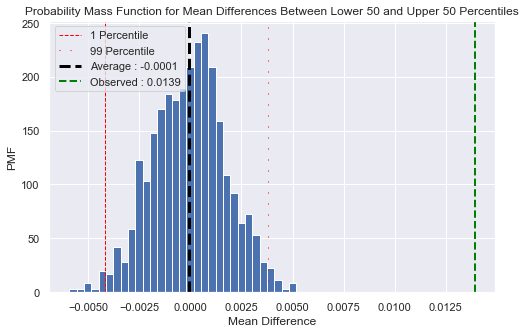

In [15]:
# Create percentile interval sizes to split the data by
interval_size = 50
size = 1000
mu_not = 0
percentiles = [interval_size, 100-interval_size]


# Prepare the data by splitting along lower and upper 50th percentiles of hospital discharge volume
low_perc, high_perc = sep_tuple_percentiles(x, y, percentiles)
low_perc, high_perc = adjust_lists(low_perc, high_perc)
mu_obs, bs_replicates = generate_bs_mean_differences(low_perc, high_perc, mu_not=mu_not, size=size)

# Find the summary statistics from our bootstrap replicates with a 99% confidence interval
mean_reps = np.mean(bs_replicates)
std_reps = np.std(bs_replicates)
p_value = np.sum(bs_replicates >= mu_obs) / len(bs_replicates)
z_score = (mu_obs - mean_reps) / std_reps

plot_percentiles = [1, 99]
labels = [f'{perc} Percentile' for perc in plot_percentiles]
linestyles = ['dashed', (0, (1, 10))]
bs_percentile_values = plot_bs_replicates(bs_replicates, plot_percentiles, labels, linestyles, observed=mu_obs)

# Label the plot
_ = plt.xlabel('Mean Difference')
_ = plt.ylabel('PMF')
_ = plt.title(f'Probability Mass Function for Mean Differences Between Lower {percentiles[0]} and Upper {percentiles[1]} Percentiles')
plt.show()

In [16]:
# Print summary statistics
print(f'Average Difference for this Distribution is {mean_reps:.4f}')
print(f'Average Difference Observed is {mu_obs:.4f}')
print(f'Standard Deviation for the Distribution is {std_reps:.4f}')
print(f'99% Confidence Interval for the Pearson Correlation Coefficient is Between {bs_percentile_values[0]:.4f} and {bs_percentile_values[1]:.4f}')
print(f'Observed P-Value is {p_value:.4f}')
print(f'Observed Z-Score is {z_score:.0f}')

Average Difference for this Distribution is -0.0001
Average Difference Observed is 0.0139
Standard Deviation for the Distribution is 0.0018
99% Confidence Interval for the Pearson Correlation Coefficient is Between -0.0042 and 0.0038
Observed P-Value is 0.0000
Observed Z-Score is 8


In [17]:
perc_split = np.percentile(x, [50])
perc_split

array([281.])

In our above analysis, we see that if we assume that our Null Hypothesis is true, our distribution of sample differences is centered along an excess rate of readmission difference of -0.0001. With a standard deviation of 0.0017, 99% of our bootstrap replicates were found between an excess rate of readmission difference of -0.0041 and 0.0039. In our observed hospital data, the average difference of excess rates of readmissions between the upper and lower 50th percentiles was 0.0139. The difference from our observation is 8 standard deviations away from the mean with a p-value of 0.0000. Because our p-value of 0.0000 is less than our $\alpha$ value of 0.01, we will reject the Null Hypothesis that there is no difference in excess rate of readmission between low and high volume hospitals in favor for the alternative.

The 50 percentile split of hospital discharge volume is 281 discharges over the course of three years. Hospitals with less than 281 discharges experienced an excess readmission rate 0.0139 points greater than hospitals with more than 281 discharges. One possible factor for this difference is that smaller hospitals are struggling to make profit over cost of business. With less people being discharged in the first place, these hospitals have less money to pay for supplies which means less quality services and staff and ultimately more readmissions. Penalizing smaller hospitals for excess rate of readmission with a fine would exacerbate these issues since these hospitals are struggling to turn a profit. The penalty puts small hospitals at risk of closing their doors which puts their patients at risk who need their services for their health needs.

In this case, smaller volume hospitals with less than 100 discharges per year (which would amount to less than 300 discharges within the timeframe provided by our data) need further examination to see where improvements can be made. If low volume hospitals are geographically close to one another, then it may be advantageous to fund expansion of one hospital to accomodate for essential workers of the other and close one down. Another possible solution would be to provide mandatory strategically located seminars for hospitals with low discharge volume to educate the staff on current hospital practices and implementing them into their businesses. After three months, every hospital with low discharge volume would then be audited for general improvement over their businesses. Hospitals that don't show significant improvement over that given timeframe are then given 3 more months to improve or lose their license as a result.